# Pore intermediates size distribution analysis




| Date started | Date completed | Experiments analyzed | Comments |
|:---|:---|:---|:----|
|09/08/2022|  |  | Fitting size histograms with several gaussians, but this may be optimized |


---

## Goal:

From STED images, one can determine size of pore intermediates (POM121 only detection + Gaussian fitting => size of the assembly = FWHM) - *so far, this is done in a Matlab program...*

One can build size distributions in different conditions (cells transfected with siRNAs against different Nups or scrambled siRNA) - *so far, this is done in a Matlab program...*

Several peaks are visible in the distribution. They most likely correspond to populations of PI at different stages of assembly. Qualitatively, these peaks vary depending on the conditions. We would like to quantify this.


**Our idea:**
1. fit the distribution curves with several gaussians (probably 3-4). Each Gaussian would correspond to limiting step.
2. quantify the percentage of pore intermediates in each step.
3. quantify how this repartition changes depending on the condition.
    

**Questions:**
- how do we know the number of gaussians is apropriate ?
- should we fix the position of the peaks ?
- the data is right-skewed because of the resolution limit and/or the px size... => should we use other distribution functions (like lognormal for instance) - and if yes, should we use this model for all peaks or only the first one ?
- **how do we evaluate our fit ?**


---


## Table of content

* [Import libraries and data](#import)

* [Define the fitting function and fit](#function)


---


## Import libraries and data <a class="anchor" id="import"></a>


In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt






In [ ]:

InputFolder = 
OutputFolder = 

data = np.loadtxt(InputFolder+'data.txt', delimiter=',')
x, y = data

plt.plot(x,y)
plt.show()

---

## Define the fitting function and fit <a class="anchor" id="function"></a>

In [4]:

def func(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        ctr = params[i]
        amp = params[i+1]
        wid = params[i+2]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
    return y


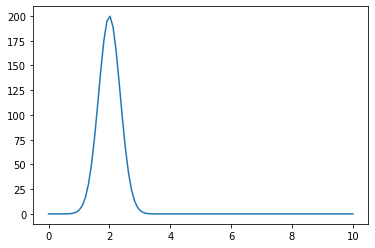

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

In [12]:
x=np.linspace(0,10,100)

params = [2,100,0.5,2,100,0.5]

y=func(x,*params)
fig,ax=plt.subplots()
ax.plot(x,y)
plt.show()

print(x,y)



In [ ]:

## initial guess
import scipy.signal
i_pk = scipy.signal.find_peaks_cwt(y, widths=range(3,len(x)//Npks))
DX = (np.max(x)-np.min(x))/float(Npks) # starting guess for component width
guess = np.ravel([[x[i], y[i], DX] for i in i_pk]) # starting guess for (x, amp, width) for each component

## optimize fit
popt, pcov = curve_fit(func, x, y, p0=guess)
print popt
fit = func(x, *popt)


## plot original data and fit
plt.plot(x, y)
plt.plot(x, fit , 'r-')
plt.show()
